<a href="https://colab.research.google.com/github/alisha-a-khan/ai-experiments/blob/master/audio-ai/audio_train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os

In [ ]:
BASEDIR='/content/gdrive/My Drive/Colab Data/audio'

In [ ]:
featuresdf=pd.read_pickle(os.path.join(BASEDIR,'alisha_data.pkl'))

In [ ]:
featuresdf.shape

(199, 2)

In [ ]:
featuresdf.head

<bound method NDFrame.head of                                                feature class_label
0    [-349.6761883061811, 77.97523127033531, -39.60...        true
1    [-162.9719763103223, 14.484394950908994, -8.11...        true
2    [-123.59541613826386, 14.752998048912946, -7.2...        true
3    [-224.82055260907148, 51.0820508547996, -3.274...        true
4    [-157.86453794559563, 35.08948012718332, -10.6...        true
..                                                 ...         ...
194  [-241.3405578986279, 63.90872696519794, -18.75...       false
195  [-491.51690450684833, 78.82440906291254, 16.72...       false
196  [-532.1695030260717, 56.05748791953128, 8.1457...       false
197  [-371.95120095021525, 75.61944273301503, -1.30...       false
198  [-461.01609481726405, 106.21097063446557, 11.0...       false

[199 rows x 2 columns]>

In [ ]:
featuresdf.head()

,feature,class_label
0,"[-349.6761883061811, 77.97523127033531, -39.60...",true
1,"[-162.9719763103223, 14.484394950908994, -8.11...",true
2,"[-123.59541613826386, 14.752998048912946, -7.2...",true
3,"[-224.82055260907148, 51.0820508547996, -3.274...",true
4,"[-157.86453794559563, 35.08948012718332, -10.6...",true


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

In [ ]:
#first step: train a data set
#get dataset ready for training
#split the dataset into 70% train data, 30% test data



In [ ]:
#create a custom dataset. This audio dataset takes in a pandas dataframe and we create it to fit pytorch

In [ ]:
class AudioDataSet(Dataset):
  """Audio dataset."""
  def __init__(self,df):
    self.audio_df=df
  def __len__(self):
    return self.audio_df.shape[0]
  def __getitem__(self,idx):
    audio_vector=torch.FloatTensor(self.audio_df.iloc [idx,0])
    audio_label=self.audio_df.iloc[idx,1]
    if audio_label =='true':
      audio_label=torch.tensor(1)
    else:
      audio_label=torch.tensor(0)

    return audio_vector, audio_label

In [ ]:
#generate the dataset and split it into 70/30 train and validation dataset
audio_dataset=AudioDataSet(featuresdf)
train_percent=0.7
train_len=int(len(audio_dataset)*train_percent)
valid_len=len(audio_dataset)-train_len
train_set, validation_set= torch.utils.data.random_split(audio_dataset, [train_len, valid_len])


In [ ]:
#create the train and test loader
trainloader=DataLoader(train_set, batch_size=4, shuffle=True, num_workers=0)
testloader=DataLoader(validation_set, batch_size=4, shuffle=True, num_workers=0)



In [ ]:
dataiter=iter(trainloader)
audio,label=dataiter.next()
print(audio)
print(label)
print(audio.shape)

tensor([[-3.2938e+02,  5.5541e+01,  7.6758e+00,  9.4134e+00,  1.3747e+00,
          2.1947e+01, -1.2915e+01,  1.7735e+01, -1.6053e+01,  2.1031e+01,
         -1.2320e+01,  7.5442e+00, -8.9497e+00,  9.3118e+00, -7.5457e+00,
          2.5884e+00, -6.0674e+00,  9.1662e+00, -5.8372e+00,  2.0469e+00,
         -8.8797e+00,  1.8904e+00, -1.0642e+01, -3.2958e+00, -4.5803e+00,
          3.1916e+00, -4.7153e+00, -2.0303e+00, -5.6833e+00,  4.4010e+00,
         -2.7531e+00,  6.5042e+00, -4.7800e-01,  3.4702e+00, -2.7000e-01,
          1.4842e+00, -5.0798e-01,  4.4213e+00, -2.7059e+00,  1.9273e+00],
        [-1.0072e+02,  7.2745e+01, -4.6571e+01,  1.0952e+01,  5.6281e+00,
          2.1467e+01, -1.5759e+01,  1.0386e+01, -1.1405e+01,  1.6754e+01,
         -1.9471e+01,  3.0589e+00, -2.1006e+01, -3.7226e+00, -2.2091e+01,
         -8.3740e-02, -8.0710e+00,  1.5623e+01, -1.1426e+00,  1.3769e+01,
         -3.7043e+00,  5.6246e+00, -2.3340e+00,  6.8958e+00, -2.9679e+00,
          8.3436e+00, -3.0478e-01,  4

In [ ]:
from torch import nn
import torch.nn.functional as F
from torch import optim

In [ ]:
#our network has 40 inputs and 2 outputs
#one image goes in, true and false go out
#two hidden layers in the neural network
#two hidden layers of size 256 and 128

class AudioNetwork(nn.Module):
  def __init__(self):
    super().__init__()

    #create first layer
    self.fc1=nn.Linear(40,256)
    self.fc2=nn.Linear(256,128)
    self.fc3=nn.Linear(128,2)

    self.dropout= nn.Dropout(p=0.2)
    #define activations
    #sigmoid function
  def forward(self,x):
    #hidden layer 1 with relu activation
    x=self.fc1(x)
    x=F.relu(x)
    x=self.dropout(x)

    #hidden layer 2 with relu activation
    x=self.fc2(x)
    x=F.relu(x)
    x=self.dropout(x)

    #output layer 3 with log softmax activation
    x=self.fc3(x)
    x=F.log_softmax(x,dim=1)
    

    return x




In [ ]:
#testing
model=AudioNetwork()

In [ ]:
model

AudioNetwork(
  (fc1): Linear(in_features=40, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [ ]:
criterion=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(), lr=0.001)


dataiter=iter(trainloader)
audio,label=dataiter.next()
#forward pass
log_ps=model(audio)

ps= torch.exp(log_ps)
print(label)
#print(ps.topk(2))
print(ps.topk(1))
#loss function is difference bw probability and label

loss=criterion(log_ps, label)
print(loss)

#gradient descent is loss.backward and optimizer.step
loss.backward()
#^this computes derivative of loss/ dx, now we hv to apply this
optimizer.step()


#clear gradients prior to a new pass
optimizer.zero_grad()
#forward pass when you run data through a model
log_ps=model(audio)
ps= torch.exp(log_ps)
print(label)
#print(ps.topk(2))
print(ps.topk(1))



tensor([0, 1, 0, 0])
torch.return_types.topk(
values=tensor([[0.9999],
        [0.6529],
        [1.0000],
        [0.9913]], grad_fn=<TopkBackward>),
indices=tensor([[1],
        [1],
        [1],
        [1]]))
tensor(6.1767, grad_fn=<NllLossBackward>)
tensor([0, 1, 0, 0])
torch.return_types.topk(
values=tensor([[1.0000],
        [0.9730],
        [1.0000],
        [0.9998]], grad_fn=<TopkBackward>),
indices=tensor([[0],
        [0],
        [0],
        [0]]))


In [ ]:
model = AudioNetwork()
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.005)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 25 #how many time you want to loop through the dataset
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for audios, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(audios)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))



Epoch: 1/25..  Training Loss: 8.496..  Test Loss: 0.306..  Test Accuracy: 0.867
Epoch: 2/25..  Training Loss: 0.600..  Test Loss: 0.750..  Test Accuracy: 0.650
Epoch: 3/25..  Training Loss: 0.449..  Test Loss: 0.308..  Test Accuracy: 0.867
Epoch: 4/25..  Training Loss: 0.354..  Test Loss: 0.515..  Test Accuracy: 0.767
Epoch: 5/25..  Training Loss: 0.349..  Test Loss: 0.299..  Test Accuracy: 0.867
Epoch: 6/25..  Training Loss: 0.301..  Test Loss: 0.311..  Test Accuracy: 0.850
Epoch: 7/25..  Training Loss: 0.248..  Test Loss: 0.352..  Test Accuracy: 0.883
Epoch: 8/25..  Training Loss: 0.310..  Test Loss: 0.339..  Test Accuracy: 0.883
Epoch: 9/25..  Training Loss: 0.331..  Test Loss: 0.467..  Test Accuracy: 0.717
Epoch: 10/25..  Training Loss: 0.322..  Test Loss: 0.317..  Test Accuracy: 0.850
Epoch: 11/25..  Training Loss: 0.251..  Test Loss: 0.433..  Test Accuracy: 0.883
Epoch: 12/25..  Training Loss: 0.416..  Test Loss: 0.285..  Test Accuracy: 0.883
Epoch: 13/25..  Training Loss: 0.659.

In [ ]:
#topk returns what the model thinks it is

In [ ]:
#in order for training you need optimizer and loss function

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

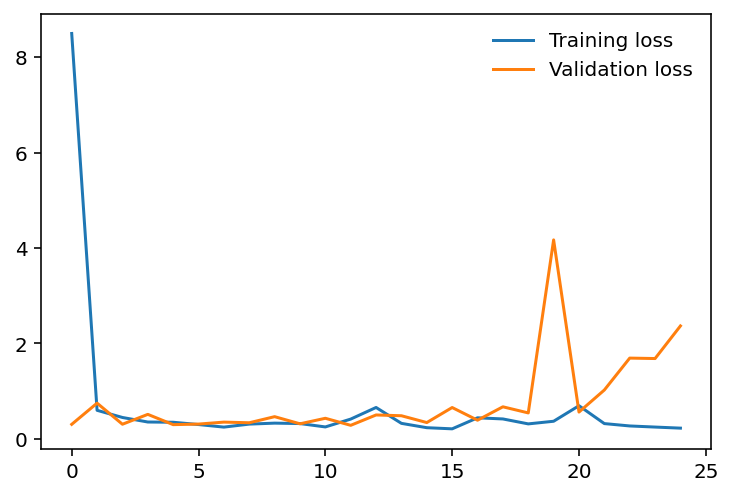

In [ ]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [ ]:
dataiter=iter(testloader)
audio,label=dataiter.next()

with torch.no_grad():
  log_ps=model.forward(audio)
ps=torch.exp(log_ps)
print(label)
print(ps.topk(1))

tensor([1, 0, 1, 1])
torch.return_types.topk(
values=tensor([[0.9586],
        [0.6058],
        [0.7456],
        [0.9933]]),
indices=tensor([[1],
        [0],
        [1],
        [1]]))


In [ ]:
torch.save(model.state_dict(),os.path.join(BASEDIR,'alisha_model.pkl'))


In [ ]:
model2=AudioNetwork()

In [ ]:
state_dict=torch.load(os.path.join(BASEDIR,'alisha_model.pkl'))

In [ ]:
model2.load_state_dict(state_dict)

<All keys matched successfully>

In [ ]:
dataiter=iter(testloader)
audio,label=dataiter.next()

with torch.no_grad():
  log_ps=model2.forward(audio)
ps=torch.exp(log_ps)
print(label)
print(ps.topk(1))

tensor([0, 1, 0, 1])
torch.return_types.topk(
values=tensor([[0.9638],
        [0.9927],
        [0.9964],
        [0.9974]]),
indices=tensor([[0],
        [1],
        [0],
        [0]]))
